<a href="https://colab.research.google.com/github/mahmoudelhout86/Customer_Loyality_DEPI_SHR2_AIS4_G1/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import os




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/final.csv')

In [ ]:
df=df.drop(['card_id.1','card_id_','trans_purchase_date_max','trans_purchase_date_min','merchant_id_mode'],axis = 1)

X=df.drop(columns=['target','card_id'])
y=df['target']

In [ ]:
X.columns.tolist()

['trans_purchase_year_mode',
 'trans_purchase_month_mean',
 'trans_purchase_month_mode',
 'trans_purchase_day_mode',
 'trans_purchase_dow_mode',
 'trans_purchase_hour_min',
 'trans_purchase_hour_max',
 'trans_purchase_hour_mode',
 'trans_is_weekend_mean',
 'trans_is_weekend_sum',
 'trans_is_weekend_mode',
 'trans_month_difference_sum',
 'trans_month_difference_mean',
 'trans_month_difference_min',
 'trans_month_difference_max',
 'first_transaction',
 'last_transaction',
 'trans_purchase_amount_sum',
 'trans_purchase_amount_max',
 'trans_purchase_amount_min',
 'trans_purchase_amount_mean',
 'trans_purchase_amount_median',
 'authorized_flag_sum',
 'authorized_flag_mean',
 'city_id_mode',
 'city_id_nunique',
 'category_1_sum',
 'category_1_mean',
 'category_1_mode',
 'category_2_sum',
 'category_2_mean',
 'category_2_mode',
 'category_3_sum',
 'category_3_mean',
 'category_3_mode',
 'installments_mean',
 'installments_sum',
 'installments_min',
 'installments_max',
 'installments_mode',
 

In [ ]:
X.head()

,trans_purchase_year_mode,trans_purchase_month_mean,trans_purchase_month_mode,trans_purchase_day_mode,trans_purchase_dow_mode,trans_purchase_hour_min,trans_purchase_hour_max,trans_purchase_hour_mode,trans_is_weekend_mean,trans_is_weekend_sum,...,feature_min,feature_std,feature_range,feature_sum_x_days,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,days_feature_3_ratio
0,2017.0,7.670213,12.0,11.0,5.0,0.0,23.0,14.0,0.340426,96.0,...,1,2.081666,4,792,495,0.050505,198,0.020202,99,0.010101
1,2017.0,6.169972,1.0,19.0,5.0,0.0,23.0,12.0,0.371105,131.0,...,0,2.081666,4,495,396,0.040404,99,0.010101,0,0.000000
2,2017.0,4.545455,4.0,21.0,4.0,8.0,23.0,19.0,0.272727,12.0,...,0,1.154701,2,444,222,0.018018,222,0.018018,0,0.000000
3,2017.0,7.481481,10.0,7.0,2.0,0.0,23.0,16.0,0.160494,13.0,...,0,2.081666,4,693,396,0.040404,297,0.030303,0,0.000000
4,2018.0,5.061350,1.0,7.0,4.0,0.0,23.0,11.0,0.331288,54.0,...,0,1.527525,3,396,99,0.010101,297,0.030303,0,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
base_model=model.fit(X_train, y_train)

In [ ]:
importances_DT=base_model.feature_importances_
feature_names=X.columns

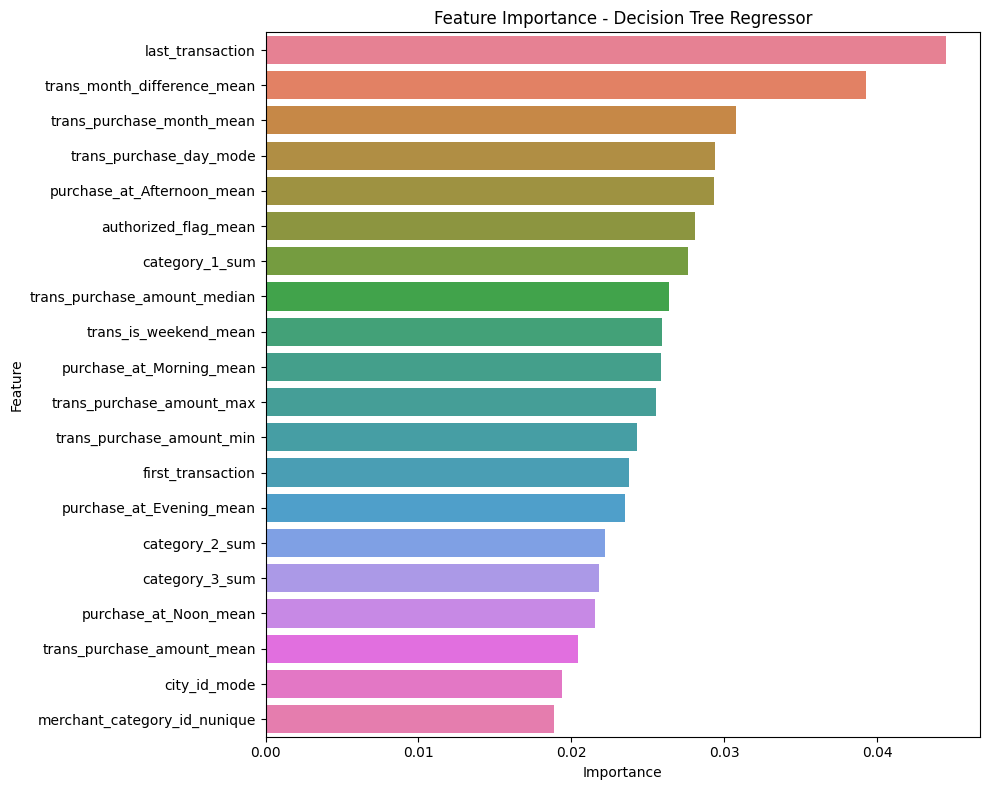

In [ ]:
feature_imp_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances_DT})
    .sort_values(by='Importance', ascending=False)
)
top_20_features = feature_imp_df.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features,hue='Feature')
plt.title('Feature Importance - Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

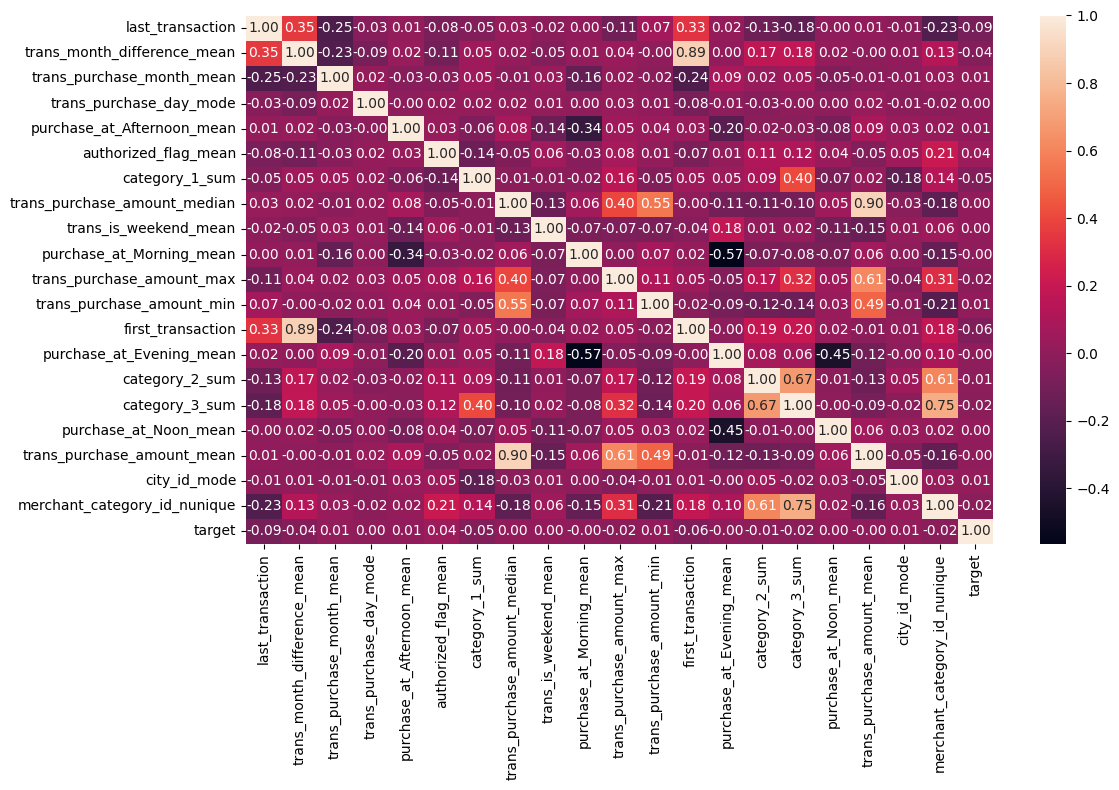

In [ ]:
top_20_features_list=top_20_features.Feature.tolist()
corr = df[top_20_features_list+ ['target']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

In [ ]:
random_forest_model = RandomForestRegressor()

In [ ]:
model=random_forest_model.fit(X_train, y_train)
importances_RF=model.feature_importances_

In [ ]:
feature_imp_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances_RF})
    .sort_values(by='Importance', ascending=False)
)
top_20_features = feature_imp_df.head(20)
top_20_features_list=top_20_features.Feature.tolist()

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features,hue='Feature')
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
corr = df[top_20_features_list+ ['target']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[top_20_features_list], y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mse)
print(r2)
print(mae)
print(rmse)

14.755051538946951
0.016416898877879893
1.6218845602991148
3.8412304719903165


In [ ]:
models = {
   # "Ridge": Pipeline([("scaler", StandardScaler()), ("model", Ridge())]),
    #"Lasso": Pipeline([("scaler", StandardScaler()), ("model", Lasso())]),
    #"ElasticNet": Pipeline([("scaler", StandardScaler()), ("model", ElasticNet())]),
    #"KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor())]),
    #"BayesianRidge": Pipeline([("scaler", StandardScaler()), ("model", BayesianRidge())]),

    # No scaler
    "RandomForest": Pipeline([("model", RandomForestRegressor())]),
    "GradientBoosting": Pipeline([("model", GradientBoostingRegressor())]),
    "DecisionTree": Pipeline([("model", DecisionTreeRegressor())]),
    "AdaBoost": Pipeline([("model", AdaBoostRegressor())]),
    "XGBoost": Pipeline([("model", XGBRegressor(objective='reg:squarederror'))]),
    "LightGBM": Pipeline([("model", LGBMRegressor())])
}

In [ ]:
param_grids = {
    "Ridge": {"model__alpha": np.logspace(-3, 3, 30)},
    "Lasso": {"model__alpha": np.logspace(-3, 3, 30)},
    "ElasticNet": {
        "model__alpha": np.logspace(-3, 3, 20),
        "model__l1_ratio": np.linspace(0, 1, 10)
    },
    "RandomForest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.1],
        "model__max_depth": [3, 5]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    },

    "KNN": {
        "model__n_neighbors": [3, 5, 10],
        "model__weights": ['uniform', 'distance']
    },
    "BayesianRidge": {},  # no hyperparameters for now
    "AdaBoost": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.01, 0.1, 1]
    },
    "XGBoost": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5],
        "model__learning_rate": [0.01, 0.1]
    },
    "LightGBM": {
        "model__n_estimators": [100, 200],
        "model__num_leaves": [31, 50],
        "model__learning_rate": [0.01, 0.1]
    }
}

In [ ]:
# Define CV and scoring
cv = KFold(n_splits=3, shuffle=True, random_state=42)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Where to save best models
os.makedirs("saved_models", exist_ok=True)

results = {}

for name, pipeline in models.items():
    print(f"\n Tuning: {name}")
    param_grid = param_grids.get(name, {})

    rs = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=min(10, len(param_grid)) if param_grid else 1,
        cv=cv,
        scoring=rmse_scorer,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    # Fit
    rs.fit(X_train, y_train)

    # Cross-validated RMSE
    best_rmse = np.sqrt(-rs.best_score_)

    # Best model
    best_model = rs.best_estimator_

    # Predict & Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Save results
    results[name] = {
        "best_estimator": best_model,
        "best_score_rmse": best_rmse,
        "test_score_rmse": test_rmse,
        "best_params": rs.best_params_
    }

    #  save model
    joblib.dump(best_model, f"saved_models/{name}_best_model.pkl")
    print(f"==> Saved {name} model to disk.")


 Tuning: Ridge
Fitting 5 folds for each of 1 candidates, totalling 5 fits
==> Saved Ridge model to disk.

 Tuning: Lasso
Fitting 5 folds for each of 1 candidates, totalling 5 fits
==> Saved Lasso model to disk.

 Tuning: ElasticNet
Fitting 5 folds for each of 2 candidates, totalling 10 fits
==> Saved ElasticNet model to disk.

 Tuning: KNN
Fitting 5 folds for each of 2 candidates, totalling 10 fits
==> Saved KNN model to disk.

 Tuning: BayesianRidge
Fitting 5 folds for each of 1 candidates, totalling 5 fits
==> Saved BayesianRidge model to disk.

 Tuning: RandomForest
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


==> Saved RandomForest model to disk.

 Tuning: GradientBoosting
Fitting 5 folds for each of 3 candidates, totalling 15 fits
==> Saved GradientBoosting model to disk.

 Tuning: DecisionTree
Fitting 5 folds for each of 2 candidates, totalling 10 fits
==> Saved DecisionTree model to disk.

 Tuning: AdaBoost
Fitting 5 folds for each of 2 candidates, totalling 10 fits
==> Saved AdaBoost model to disk.

 Tuning: XGBoost
Fitting 5 folds for each of 3 candidates, totalling 15 fits
==> Saved XGBoost model to disk.

 Tuning: LightGBM
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4650
[LightGBM] [Info] Number of data points in the train set: 161528, number of used features: 20
[LightGBM] [Info] Start training from score -0.392802
==> Saved LightGBM model to disk.


In [ ]:
#  Summary
baseline_rmse = 3.84
for name, res in results.items():
    test_rmse = res["test_score_rmse"]
    cv_rmse = res["best_score_rmse"]

    test_score_percent = (1 - (test_rmse / baseline_rmse)) * 100

    summary_data.append({
        "Model": name,
        "CV_RMSE": round(cv_rmse, 4),
        "Test_RMSE": round(test_rmse, 4),
        "Score_%": round(test_score_percent, 2),
        "Best_Params": res["best_params"]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data).sort_values(by="Test_RMSE")

# Display table
print("\n Model Performance Summary:")
print(summary_df[["Model", "CV_RMSE", "Test_RMSE", "Score_%"]].to_string(index=False))

#  Print Best Model
best_model_row = summary_df.iloc[0]
print(f"\n Best Model: {best_model_row['Model']}")
print(f"Test RMSE: {best_model_row['Test_RMSE']']}")
print(f"Improvement Score: {best_model_row['Score_%']}%")
print(f"Best Params: {best_model_row['Best_Params']}")


 Model Performance Summary:
           Model  CV_RMSE  Test_RMSE
         XGBoost   3.7529     3.7680
GradientBoosting   3.7578     3.7697
        LightGBM   3.7644     3.7757
        AdaBoost   3.7967     3.8047
    RandomForest   3.8002     3.8159
           Ridge   3.8139     3.8413
   BayesianRidge   3.8139     3.8413
      ElasticNet   3.8440     3.8723
           Lasso   3.8449     3.8732
             KNN   4.3186     4.3232
    DecisionTree   5.4098     5.4066

 Best Model: XGBoost
Test RMSE: 3.768
Best Params: {'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1}
